# About

TBA

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, grid, fill_between, plot

def plot(metric_data, n_folds=15, figsize=(10, 4), color='g', label='Make up a label', xlabel='Epoch', ylabel=''):
    
    fold_mean = np.mean(metric_data, axis=0)
    fold_std = np.std(metric_data, axis=0)
    
    _, axes = plt.subplots(1, figsize=figsize)
    
    axes.grid()
    axes.fill_between(range(1, n_folds+1), fold_mean - fold_std,
                             fold_mean + fold_std, alpha=0.1,
                             color=color)
    
    
    axes.plot(range(1, n_folds+1), fold_mean, 'o-', color=color, label=label)

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend(loc="best")
    

# Cross-Validation Metrics

## From history.history objects

Available Metrics:  dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])
(15, 15)


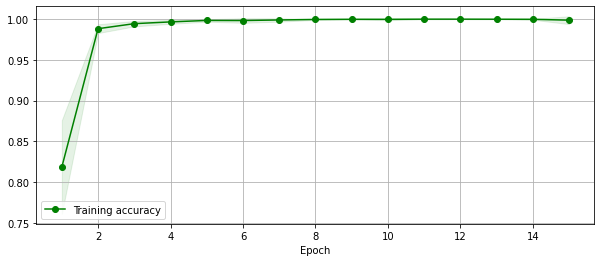

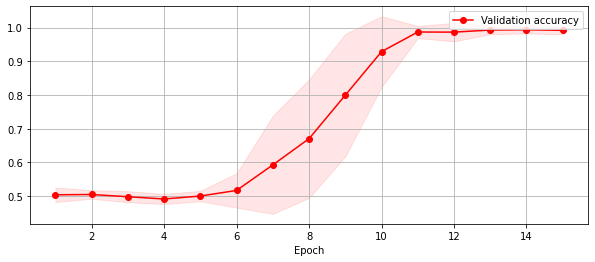

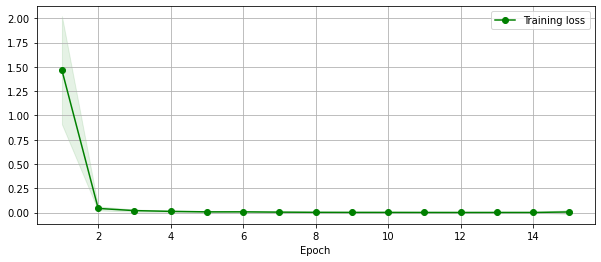

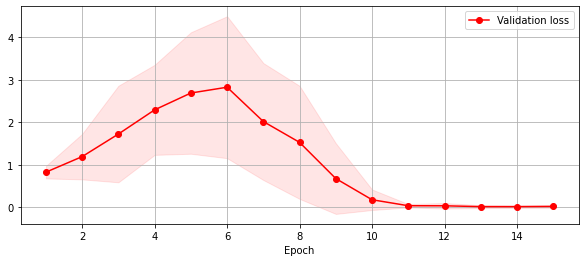

In [3]:
from glob import glob
import json, re
import os, sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('..')

# Plane Options: ['axial', 'coronal', 'sagittal', 'combined']
plane = 'combined'

ROOTDIR = '/tf/shank/HDDLinux/Stanford/data/mriqc-shared/experiments/experiment_B/128'
files = glob(ROOTDIR + '/model_save_dir_F15/train_test_fold*/metrics/' + plane + '*')

# files = glob( '../metrics/CV/train_test_fold*/metrics/' + plane + '*' )

all_metrics = {}
for file in files:
    fold = file.split('/')[-3].split('fold_')[-1]
    all_metrics[int(fold)] = json.load(open(file))
    
train_acc_arr = []
val_acc_arr = []
train_loss_arr = []
val_loss_arr = []

print("Available Metrics: ", all_metrics[1].keys())

def get_metrics_hist(all_metrics, metric='accuracy', n_folds=15):
    arr = []
    for i in range(1, n_folds+1):
        metrics = all_metrics[i]
        temp = list(range(n_folds))
        for j in range(len(temp)):
            temp[j] = metrics[metric][str(j)]

        arr.append(temp)  
    return np.array(arr)

train_acc_arr = get_metrics_hist(all_metrics)
print(train_acc_arr.shape)
val_acc_arr = get_metrics_hist(all_metrics, metric='val_accuracy')
train_loss_arr = get_metrics_hist(all_metrics, metric='loss')
val_loss_arr = get_metrics_hist(all_metrics, metric='val_loss')

plot(train_acc_arr, label='Training accuracy', n_folds=15)
plot(val_acc_arr, label='Validation accuracy', color='r', n_folds=15)
plot(train_loss_arr, label='Training loss', n_folds=15)
plot(val_loss_arr, label='Validation loss', color='r', n_folds=15)


In [6]:
print(np.mean(val_acc_arr, axis=0))
print(np.std(val_acc_arr, axis=0))

[0.50375    0.50458333 0.49791667 0.49125    0.5        0.51666667
 0.5925     0.67041667 0.79958333 0.92875    0.98708332 0.98666666
 0.99291666 0.99375    0.99208333]
[0.02150581 0.01280191 0.01640419 0.01510381 0.01547848 0.05091182
 0.14558073 0.17579383 0.18200943 0.10512393 0.01803739 0.02737345
 0.01247219 0.01094493 0.01174083]


## From tensorboard logs

Plots and logs at https://tensorboard.dev/experiment/6PdJ4SokT4mTGVvNRS64dA/

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

experiment_id = "6PdJ4SokT4mTGVvNRS64dA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,train_test_fold_1/tb_logs/axial/train,epoch_accuracy,0,0.948815
1,train_test_fold_1/tb_logs/axial/train,epoch_accuracy,1,0.994073
2,train_test_fold_1/tb_logs/axial/train,epoch_accuracy,2,0.988147
3,train_test_fold_1/tb_logs/axial/train,epoch_accuracy,3,0.996767
4,train_test_fold_1/tb_logs/axial/train,epoch_accuracy,4,0.995690
...,...,...,...,...
16195,train_test_fold_9/tb_logs/sagittal/validation,epoch_tp,10,70.000000
16196,train_test_fold_9/tb_logs/sagittal/validation,epoch_tp,11,71.000000
16197,train_test_fold_9/tb_logs/sagittal/validation,epoch_tp,12,71.000000
16198,train_test_fold_9/tb_logs/sagittal/validation,epoch_tp,13,75.000000


In [12]:
import numpy as np
print("Available Metrics: ", df['tag'].unique())

def get_metrics_tb(df, metric='epoch_accuracy', n_epochs = 15, n_folds=15, plane='combined', run='train'):
    
    temp = df[df["run"].str.contains(plane + '/' + run)]
    m = temp[temp["tag"].str.contains(metric)]

    arr = []
    for i in range(1, n_epochs+1):
        fold_i = m[m["run"].str.match('train_test_fold_' + str(i) + '/')]
        arr.append(fold_i['value'].tolist())
    
    return np.array(arr)

train_acc_arr = get_metrics_tb(df)
val_acc_arr = get_metrics_tb(df, metric='epoch_accuracy', run='validation')
train_loss_arr = get_metrics_tb(df, metric='epoch_loss', run='train')
val_loss_arr = get_metrics_tb(df, metric='epoch_loss', run='validation')


Available Metrics:  ['epoch_accuracy' 'epoch_auc' 'epoch_fn' 'epoch_fp' 'epoch_loss'
 'epoch_precision' 'epoch_recall' 'epoch_tn' 'epoch_tp']


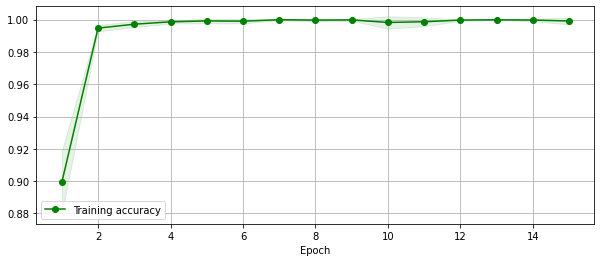

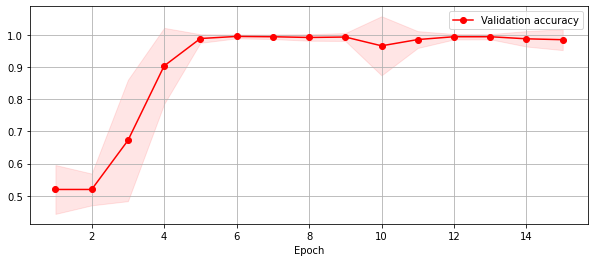

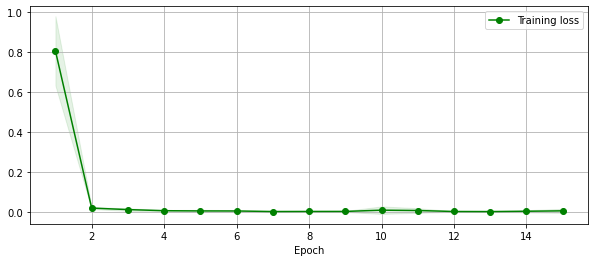

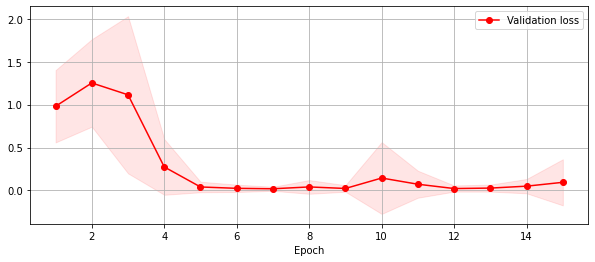

In [10]:
plot(train_acc_arr, label='Training accuracy')
plot(val_acc_arr, label='Validation accuracy', color='r')
plot(train_loss_arr, label='Training loss')
plot(val_loss_arr, label='Validation loss', color='r')

# Trained Model

- model trained on the entire dataset

Plots and logs at https://tensorboard.dev/experiment/HJGL6qx1RBme4fqkIlypPg/